출력을 원하실 경우 print() 활용  
예) print(df.head())  
  
답안 제출 예시  
수험번호.csv 생성  
DataFrame.to_csv("0000.csv", index=False)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV

warnings.filterwarnings(action='ignore')
sns.set()

In [2]:
path = "D:\\[Dataset] 작업형 제2유형"

In [3]:
X_train = pd.read_csv(os.path.join(path,'X_train.csv'), index_col="cust_id", encoding="euc-kr")
y_train = pd.read_csv(os.path.join(path,'y_train.csv'), index_col="cust_id", encoding="euc-kr")
test  = pd.read_csv(os.path.join(path,'X_test.csv'), index_col="cust_id", encoding="euc-kr")

In [4]:
df = pd.concat([X_train, y_train], axis=1)

In [5]:
df.isna().sum()

총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
gender        0
dtype: int64

In [6]:
test.isna().sum()

총구매액          0
최대구매액         0
환불금액       1611
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

<AxesSubplot:>

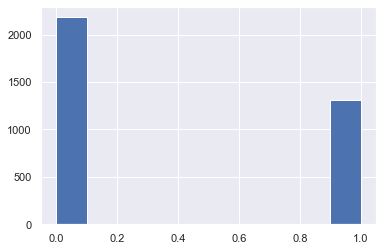

In [7]:
df['gender'].hist()

In [8]:
df['환불금액'] = df['환불금액'].fillna(0)
test['환불금액'] = test['환불금액'].fillna(0)

In [9]:
df.isna().sum().sum(), test.isna().sum().sum()

(0, 0)

In [10]:
X_data = df.drop('gender', axis=1)
y_data = df['gender']

In [11]:
obj_list = X_data.dtypes[X_data.dtypes == 'object'].index
num_list = X_data.dtypes[X_data.dtypes != 'object'].index

In [12]:
dummy_list=  pd.get_dummies(X_data[obj_list])
test_dummy_list = pd.get_dummies(test[obj_list])

In [13]:
X_data.drop(obj_list, axis=1, inplace=True)
X_data = pd.concat([X_data, dummy_list], axis=1)

In [14]:
skfold = StratifiedKFold(n_splits=10)
dt_clf = DecisionTreeClassifier(random_state=156)
RFC = RandomForestClassifier()

rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}
cv_accuracy = []

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=skfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(X_data,y_data)
RFC_best = gsRFC.best_estimator_

gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.66